<a href="https://colab.research.google.com/github/SrinijaB-05/SafeStreet-1/blob/main/Bounding_boxes_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil
import xml.etree.ElementTree as ET
from PIL import Image

# Define base paths
base_path = "/content/drive/MyDrive/Dataset"
pothole_img_dir = os.path.join(base_path, "potholes/images")
pothole_ann_dir = os.path.join(base_path, "potholes/annotations")  # XML files

cracks_base = os.path.join(base_path, "cracks")

# Output unified YOLO dataset
output_base = "/content/yolo_dataset"
img_out = os.path.join(output_base, "images")
lbl_out = os.path.join(output_base, "labels")
os.makedirs(img_out, exist_ok=True)
os.makedirs(lbl_out, exist_ok=True)

# Define class mapping
classes = ["pothole", "crack"]
class_to_id = {cls: i for i, cls in enumerate(classes)}
print(f"Class mapping: {class_to_id}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Class mapping: {'pothole': 0, 'crack': 1}


In [ ]:
def convert_voc_to_yolo(xml_file, img_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    img = Image.open(img_file)
    w, h = img.size

    yolo_lines = []
    for obj in root.findall("object"):
        cls = obj.find("name").text
        if cls not in class_to_id:
            continue
        bbox = obj.find("bndbox")
        x_min, y_min = int(bbox.find("xmin").text), int(bbox.find("ymin").text)
        x_max, y_max = int(bbox.find("xmax").text), int(bbox.find("ymax").text)

        x_center = (x_min + x_max) / 2 / w
        y_center = (y_min + y_max) / 2 / h
        width = (x_max - x_min) / w
        height = (y_max - y_min) / h

        yolo_lines.append(f"{class_to_id['pothole']} {x_center} {y_center} {width} {height}")
        return yolo_lines
print(f"✅ Converted all the images")
# Process potholes
for img_file in os.listdir(pothole_img_dir):
    if not img_file.endswith((".jpg", ".png")):
        continue
    xml_file = os.path.join(pothole_ann_dir, os.path.splitext(img_file)[0] + ".xml")
    img_path = os.path.join(pothole_img_dir, img_file)

    if not os.path.exists(xml_file):
        print(f"Missing XML for {img_file}")
        continue

    # Convert & save
    yolo_labels = convert_voc_to_yolo(xml_file, img_path)
    shutil.copy(img_path, os.path.join(img_out, img_file))
    with open(os.path.join(lbl_out, os.path.splitext(img_file)[0] + ".txt"), "w") as f:
        f.write("\n".join(yolo_labels))

✅ Converted all the images


In [ ]:
def copy_crack_data(split):
    split_path = os.path.join(cracks_base, split)
    img_dir = os.path.join(split_path, "images")
    lbl_dir = os.path.join(split_path, "labels")

    for fname in os.listdir(img_dir):
        if fname.endswith((".jpg", ".png")):
            shutil.copy(os.path.join(img_dir, fname), os.path.join(img_out, fname))

            label_file = os.path.splitext(fname)[0] + ".txt"
            label_path = os.path.join(lbl_dir, label_file)
            if os.path.exists(label_path):
                shutil.copy(label_path, os.path.join(lbl_out, label_file))
            else:
                print(f"Missing label for: {fname}")

# Apply for all splits
copy_crack_data("train")
#copy_crack_data("test")
#copy_crack_data("valid")
print("✅ Copied all")

✅ Copied all


In [ ]:
with open("data.yaml", "w") as f:
    f.write(
        f"train: {img_out}\n"
        f"val: {img_out}\n"
        f"nc: {len(classes)}\n"
        f"names: {classes}\n"
    )

print("✅ data.yaml created.")

✅ data.yaml created.


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")
model.train(data="data.yaml", epochs=90, imgsz=1024)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 329MB/s]


Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=90, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=tor

100%|██████████| 755k/755k [00:00<00:00, 20.9MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           


  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384, 576, 3, 2]              
  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576,

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 64.7±22.0 MB/s, size: 189.0 KB)


train: Scanning /content/yolo_dataset/labels... 1272 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1272/1272 [00:04<00:00, 312.15it/s]

train: New cache created: /content/yolo_dataset/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1387.9±1248.1 MB/s, size: 591.5 KB)


val: Scanning /content/yolo_dataset/labels.cache... 1272 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1272/1272 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 90 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/90      13.9G       2.09      3.631      2.257         14       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:40<00:00,  1.02s/it]


                   all       1272       2038     0.0176      0.154     0.0074    0.00218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/90      14.1G      2.325       2.95      2.445         24       1024: 100%|██████████| 80/80 [01:43<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


                   all       1272       2038     0.0023      0.103   0.000982   0.000304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/90      14.3G      2.285      3.003      2.429         26       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:39<00:00,  1.01it/s]


                   all       1272       2038    0.00573      0.405    0.00414    0.00144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/90      14.2G      2.231      2.965      2.386         23       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]


                   all       1272       2038     0.0685      0.108     0.0258     0.0073

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/90      14.3G      2.132      2.875      2.305         30       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]


                   all       1272       2038     0.0889      0.138     0.0446      0.014

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/90      14.3G      2.068      2.774      2.262         21       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]


                   all       1272       2038       0.12      0.103     0.0671     0.0274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/90      14.2G      2.023      2.683      2.207         30       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:39<00:00,  1.02it/s]


                   all       1272       2038      0.156      0.175     0.0916     0.0365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/90      14.2G       1.99      2.567      2.152         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:39<00:00,  1.01it/s]


                   all       1272       2038      0.181      0.158      0.103     0.0453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/90      14.2G      1.911      2.516      2.085         30       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]


                   all       1272       2038      0.301      0.275       0.21     0.0931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/90      14.2G      1.879      2.493      2.082         24       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]


                   all       1272       2038       0.26      0.171       0.16     0.0766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/90      14.2G      1.858      2.421       2.05         24       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]

                   all       1272       2038      0.356      0.275      0.219     0.0878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/90      14.2G      1.849      2.431      2.062         17       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


                   all       1272       2038      0.285      0.306      0.231     0.0981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/90      14.2G      1.788      2.335      2.009         27       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]


                   all       1272       2038      0.387      0.196      0.198     0.0948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/90      14.2G      1.753      2.322      1.985         18       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]


                   all       1272       2038      0.261      0.265      0.218      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/90      14.2G      1.752       2.28      1.965         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]


                   all       1272       2038      0.375      0.317      0.256      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/90      14.3G      1.734      2.246       1.97         17       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.357      0.323       0.26       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/90      14.2G      1.723      2.213      1.981         37       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:39<00:00,  1.03it/s]

                   all       1272       2038      0.355      0.306      0.269       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/90      14.2G      1.725      2.222      1.953         19       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.425       0.31        0.3      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/90      14.2G       1.71      2.229      1.936         27       1024: 100%|██████████| 80/80 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.417      0.293      0.276      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/90      14.2G      1.684      2.144       1.91         23       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]


                   all       1272       2038      0.383      0.313      0.285      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/90      14.3G      1.678      2.105      1.919         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.382      0.359      0.308      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/90      14.3G      1.667      2.079      1.903         29       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.487      0.357      0.358      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/90      14.3G       1.64      2.082      1.843         39       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.453       0.38      0.355      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/90      14.3G      1.621      2.065      1.861         19       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.413      0.297      0.285      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/90      14.2G      1.636      2.055      1.855         15       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038       0.44      0.369      0.356      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/90      14.3G      1.615      2.022      1.836         21       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038       0.49      0.373      0.373       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/90      14.2G      1.573      1.981      1.802         24       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.513      0.382       0.39      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/90      14.4G      1.597      2.002      1.822         13       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.502      0.384      0.404      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/90      14.3G      1.575      1.955       1.81         18       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.487      0.394      0.406      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/90      14.3G      1.571      1.943      1.805         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.538      0.394      0.433      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/90      14.2G      1.554      1.951      1.792         20       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.554      0.396      0.434      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/90      14.2G      1.563      1.913      1.806         31       1024: 100%|██████████| 80/80 [01:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.477      0.407      0.405      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/90      14.3G      1.529      1.884      1.801         14       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.502      0.436      0.427      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/90      14.3G      1.526      1.863      1.785         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.476      0.419      0.437      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/90      14.2G      1.521       1.84      1.758         25       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038       0.47       0.42      0.416      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/90      14.2G      1.482      1.809      1.755         19       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.559      0.397      0.452      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/90      14.2G      1.505       1.82      1.757         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:39<00:00,  1.02it/s]

                   all       1272       2038      0.524      0.402      0.451      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/90      14.3G      1.517      1.816      1.747         24       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.513       0.44      0.463      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/90      14.2G      1.472      1.761      1.723         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.551       0.45      0.487      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/90      14.2G      1.473       1.79      1.726         24       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.459      0.436      0.428      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/90      14.3G      1.484      1.791      1.724         36       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.529      0.477        0.5      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/90      14.2G      1.462      1.719      1.708         17       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.563      0.475      0.527      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/90      14.3G      1.421      1.671      1.683         19       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.535      0.481      0.527      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/90      14.2G      1.405      1.636      1.678         21       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.558      0.504      0.523      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/90      14.3G      1.428      1.652      1.678         16       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.563      0.474      0.527      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/90      14.3G       1.42      1.653      1.689         25       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.553      0.485      0.516      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/90      14.2G      1.425      1.663      1.682         16       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.576      0.516      0.561      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/90      14.2G      1.411      1.627      1.663         20       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.601       0.48       0.54      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/90      14.2G      1.403      1.648      1.646         27       1024: 100%|██████████| 80/80 [01:43<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.552      0.498      0.544      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/90      14.2G      1.388      1.629      1.654         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.614      0.507      0.584      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/90      14.2G      1.399      1.616      1.663         26       1024: 100%|██████████| 80/80 [01:43<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.595      0.551      0.574      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/90      14.3G      1.352      1.569      1.636         27       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.591      0.513      0.555       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/90      14.3G      1.397      1.613      1.655         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]

                   all       1272       2038      0.545      0.557      0.562      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/90      14.3G      1.323      1.558      1.594         32       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.635      0.512      0.593      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/90      14.3G      1.327      1.503      1.593         35       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:39<00:00,  1.02it/s]

                   all       1272       2038      0.616      0.531      0.612      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/90      14.5G      1.312      1.473      1.594         29       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.627      0.548      0.614      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/90      14.2G      1.303       1.48      1.575         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.637      0.551      0.608      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/90      14.3G      1.342      1.525      1.608         38       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:39<00:00,  1.02it/s]

                   all       1272       2038      0.631       0.56      0.622      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/90      14.3G      1.274      1.444      1.564         21       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]

                   all       1272       2038      0.594      0.573      0.634      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/90      14.2G      1.291       1.44      1.569         24       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]

                   all       1272       2038      0.633      0.613      0.666      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/90      14.2G      1.286      1.463      1.567         18       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.603      0.614      0.652      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/90      14.3G      1.298      1.437       1.57         53       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.653      0.581       0.67      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/90      14.3G      1.262      1.404       1.55         18       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:37<00:00,  1.05it/s]

                   all       1272       2038      0.631      0.607      0.679      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/90      14.2G      1.253      1.389      1.544         21       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.698      0.571      0.675      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/90      14.3G       1.24       1.38      1.526         20       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.654      0.582      0.672      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/90      14.2G      1.236       1.35      1.519         28       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.606      0.622      0.666      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/90      14.2G      1.233      1.358      1.527         34       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.673      0.621      0.704      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/90      14.3G      1.212      1.376       1.53         23       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.658      0.643      0.709      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/90      14.3G      1.198      1.314      1.494         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]

                   all       1272       2038      0.692       0.62      0.715      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/90      14.3G      1.221       1.34      1.522         15       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.662      0.663      0.724      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/90      14.2G      1.207      1.325      1.524         30       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.695      0.659      0.744      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/90      14.2G      1.154      1.261      1.468         19       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.673      0.696      0.748       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/90      14.2G      1.172      1.262      1.475         19       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038       0.73      0.679      0.766      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/90      14.2G       1.16      1.249      1.473         16       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.732      0.686      0.776      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/90      8.35G      1.157      1.218      1.464         20       1024: 100%|██████████| 80/80 [01:43<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.733      0.698      0.785      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/90      14.2G      1.161      1.236       1.47         21       1024: 100%|██████████| 80/80 [01:43<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.733      0.693      0.779      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/90      14.2G       1.16       1.22      1.465         22       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.706      0.703      0.774       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/90      14.2G      1.109      1.171      1.432         20       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.758      0.722      0.798      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/90      14.2G      1.105      1.173      1.422         25       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.756      0.727      0.808      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/90      14.2G      1.089      1.167      1.421         36       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]

                   all       1272       2038      0.745      0.732      0.805       0.56


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/90      14.5G      1.166      1.144      1.458         12       1024: 100%|██████████| 80/80 [01:44<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038       0.79      0.723      0.819      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/90      14.3G      1.108      1.054      1.411          8       1024: 100%|██████████| 80/80 [01:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]

                   all       1272       2038      0.777       0.75      0.828      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/90      14.5G      1.089      1.033      1.389          9       1024: 100%|██████████| 80/80 [01:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:37<00:00,  1.05it/s]

                   all       1272       2038      0.793       0.76      0.847      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/90      14.2G      1.064      1.009      1.383         23       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.802      0.777      0.859       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/90      14.2G      1.035     0.9593      1.352          8       1024: 100%|██████████| 80/80 [01:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.801      0.787      0.869      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      86/90      14.5G      1.024     0.9834      1.358         20       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]

                   all       1272       2038      0.826       0.78      0.874      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      87/90      14.5G      1.015     0.9454      1.362         16       1024: 100%|██████████| 80/80 [01:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]

                   all       1272       2038      0.833      0.788      0.882      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      88/90      14.2G      1.017     0.9274      1.345         15       1024: 100%|██████████| 80/80 [01:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:37<00:00,  1.05it/s]

                   all       1272       2038       0.83      0.801      0.886      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      89/90      14.2G     0.9975     0.9149      1.336         17       1024: 100%|██████████| 80/80 [01:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]

                   all       1272       2038      0.836      0.799      0.888       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      90/90      14.2G     0.9719     0.8837      1.307          9       1024: 100%|██████████| 80/80 [01:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:37<00:00,  1.05it/s]

                   all       1272       2038      0.859      0.781       0.89      0.671



90 epochs completed in 3.579 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:40<00:00,  1.01s/it]


                   all       1272       2038      0.858      0.781       0.89      0.672
               pothole       1272       2038      0.858      0.781       0.89      0.672
Speed: 0.5ms preprocess, 24.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ce0761d19d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import shutil
import os

# Ensure destination directory exists
os.makedirs("/content/drive/MyDrive/SafeStreetModels", exist_ok=True)

# Save best model to Google Drive
local_model_path = "runs/detect/train/weights/best.pt"
drive_model_path = "/content/drive/MyDrive/SafeStreetModels/best.pt"
shutil.copy(local_model_path, drive_model_path)
print(f"✅ Model successfully saved to: {drive_model_path}")

✅ Model successfully saved to: /content/drive/MyDrive/SafeStreetModels/best.pt



image 1/1 /content/drive/MyDrive/Dataset/potholes/images/potholes294.png: 768x1024 5 potholes, 72.4ms
Speed: 12.3ms preprocess, 72.4ms inference, 2.6ms postprocess per image at shape (1, 3, 768, 1024)
Number of detections: 5


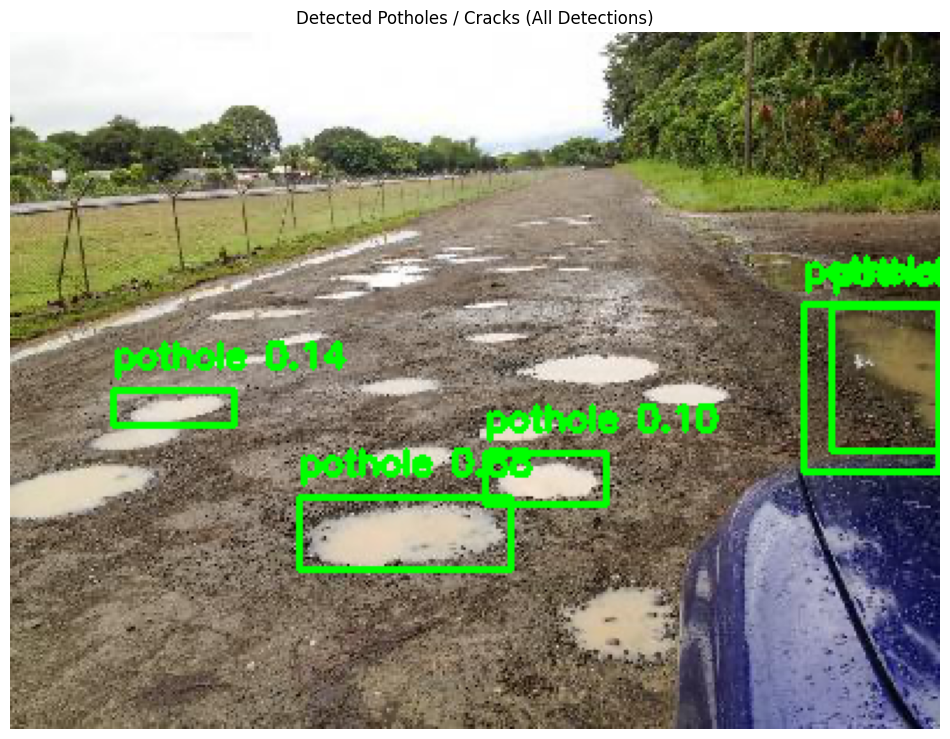

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load trained YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

# Path to your test image
img_path = "/content/drive/MyDrive/Dataset/potholes/images/potholes294.png"

# Run prediction (inference)
results = model.predict(source=img_path, conf=0.1)
print("Number of detections:", len(results[0].boxes))  # <-- Add this line

# Load and prepare image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw all detected boxes
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        conf = box.conf[0].item()
        cls_id = int(box.cls[0])
        label = model.names[cls_id]

        # Draw box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Draw label
        text = f'{label} {conf:.2f}'
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show image
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Detected Potholes / Cracks (All Detections)")
plt.show()


image 1/1 /content/drive/MyDrive/Dataset/potholes/images/potholes1.png: 768x1024 1 pothole, 61.5ms
Speed: 4.5ms preprocess, 61.5ms inference, 1.5ms postprocess per image at shape (1, 3, 768, 1024)


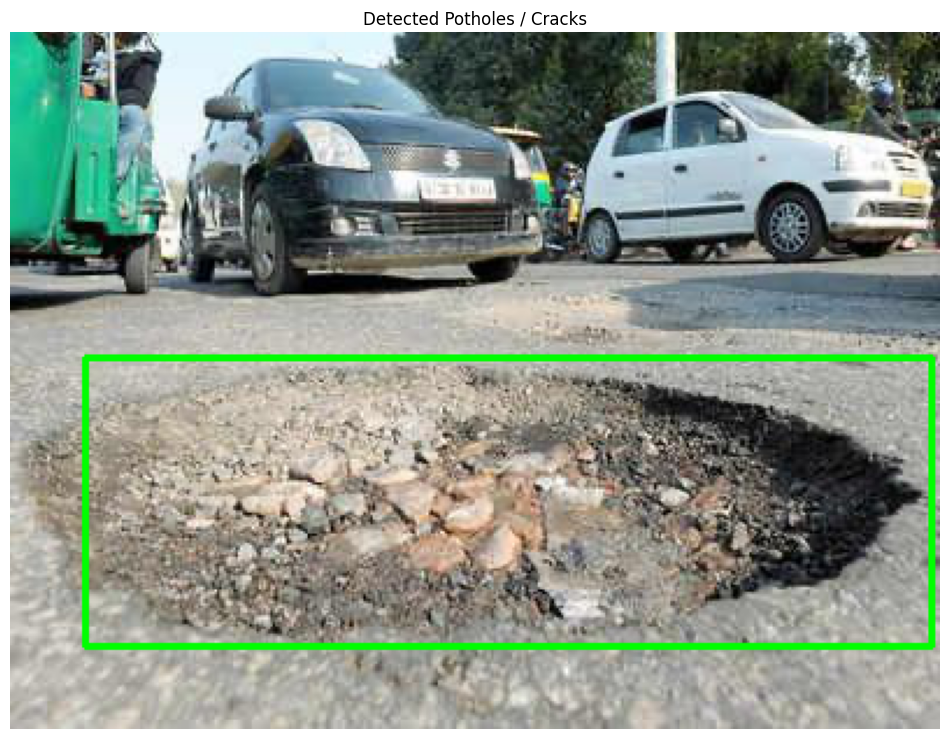

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load trained YOLOv8 model
model = YOLO("runs/detect/train/weights/best.pt")

# Path to the test image
img_path = "/content/drive/MyDrive/Dataset/potholes/images/potholes1.png"

# Run inference
results = model.predict(source=img_path, conf=0.1)[0]  # Get first result

# Load image with OpenCV and convert to RGB
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes without labels
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)  # Get box coords
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw green box

# Show the image with bounding boxes
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Detected Potholes / Cracks")
plt.show()

Saving 20160407_164918_jpg.rf.0a81ddcdae032adbb8271645aa7a361f.jpg to 20160407_164918_jpg.rf.0a81ddcdae032adbb8271645aa7a361f.jpg

image 1/1 /content/20160407_164918_jpg.rf.0a81ddcdae032adbb8271645aa7a361f.jpg: 1024x1024 1 pothole, 67.0ms
Speed: 8.0ms preprocess, 67.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


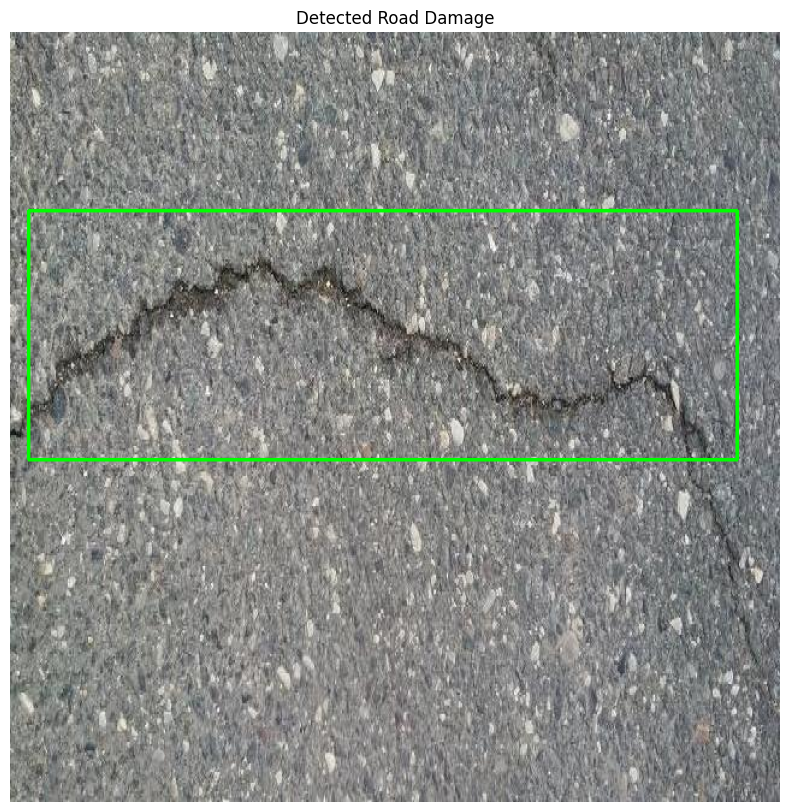

In [ ]:
from google.colab import files
uploaded = files.upload()

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")  # Adjust path if needed

# Use the uploaded image path (run this after you've uploaded using files.upload)
uploaded_img_path = list(uploaded.keys())[0]

# Run detection
results = model.predict(source=uploaded_img_path, conf=0.25)[0]

# Load and convert the image
img = cv2.imread(uploaded_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw only green rectangles around each detected object
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

# Show the result
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Detected Road Damage")
plt.show()